<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/c_Copy_of_Copy_of_Copy_of_Concrete_Data_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
concrete_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro-to-KERAS/concrete_data.csv', encoding='ISO-8859-1')

In [ ]:
#sns.pairplot(concrete_df)

In [ ]:
concrete_df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:

X = concrete_df.drop(['Strength'], axis = 1)


In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [ ]:

input_shape=X_train.shape[1]

In [ ]:
X_train.shape

(721, 8)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()


In [ ]:
model = regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 2s - loss: 467.8960 - mse: 467.8960 - val_loss: 368.2867 - val_mse: 368.2867 - 2s/epoch - 107ms/step
Epoch 2/50
16/16 - 0s - loss: 408.7021 - mse: 408.7021 - val_loss: 336.8242 - val_mse: 336.8242 - 251ms/epoch - 16ms/step
Epoch 3/50
16/16 - 0s - loss: 373.6326 - mse: 373.6326 - val_loss: 296.7627 - val_mse: 296.7627 - 109ms/epoch - 7ms/step
Epoch 4/50
16/16 - 0s - loss: 336.2449 - mse: 336.2449 - val_loss: 275.2361 - val_mse: 275.2361 - 131ms/epoch - 8ms/step
Epoch 5/50
16/16 - 0s - loss: 308.5979 - mse: 308.5979 - val_loss: 250.4343 - val_mse: 250.4343 - 97ms/epoch - 6ms/step
Epoch 6/50
16/16 - 0s - loss: 285.9952 - mse: 285.9952 - val_loss: 231.5489 - val_mse: 231.5489 - 93ms/epoch - 6ms/step
Epoch 7/50
16/16 - 0s - loss: 276.5734 - mse: 276.5734 - val_loss: 238.7595 - val_mse: 238.7595 - 174ms/epoch - 11ms/step
Epoch 8/50
16/16 - 0s - loss: 253.8667 - mse: 253.8667 - val_loss: 209.4481 - val_mse: 209.4481 - 117ms/epoch - 7ms/step
Epoch 9/50
16/16 - 0s - loss: 242

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


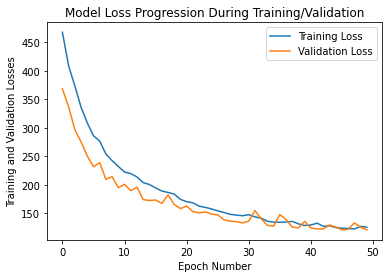

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

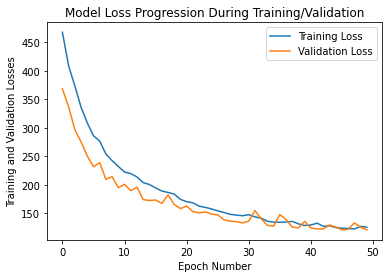

In [ ]:
plt.plot(epochs_hist.history['mse'])
plt.plot(epochs_hist.history['val_mse'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from keras.losses import mean_squared_error

In [ ]:
result = np.sqrt(mean_squared_error(y_test,y_pred))
result

array([28.360893, 22.6023  , 28.416052, 22.362028, 20.602648, 17.997072,
       17.154762, 16.673904, 18.837389, 17.164368, 18.274189, 21.128042,
       30.48309 , 24.797192, 17.129532, 20.088753, 16.552326, 16.896025,
       16.732357, 16.611065, 16.72526 , 17.632534, 16.53096 , 17.45514 ,
       16.760012, 17.089272, 27.25539 , 17.428774, 16.839024, 18.952847,
       16.483223, 16.458683, 19.964674, 16.93475 , 16.76672 , 16.864597,
       18.970493, 17.396694, 21.05032 , 16.761797, 21.064188, 24.313457,
       17.17266 , 21.102282, 19.856323, 26.435997, 22.62335 , 25.184143,
       20.251726, 20.575914, 18.275097, 16.53256 , 17.161198, 16.460186,
       23.603773, 22.964407, 19.468435, 25.068764, 18.313957, 23.6929  ,
       17.344963, 19.074802, 16.649345, 23.448505, 18.64458 , 20.238337,
       16.462214, 23.7208  , 18.202417, 17.87383 , 21.944542, 21.40515 ,
       25.266577, 18.291332, 17.234644, 21.056034, 28.969881, 16.71856 ,
       31.508696, 20.327017, 16.777493, 19.65843 , 

In [ ]:
from keras.losses import mean_squared_error

Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [19.6901   21.73647  36.379112 20.731163 29.425165 17.391016 18.99157
 22.925278 18.944302 21.075233 18.36324  26.594358 27.584793 17.93511
 19.45833  16.69815  18.199701 22.49807  16.773603 18.057701 16.539778
 16.898045 17.994867 27.369543 17.34818  17.042557 31.063795 17.794971
 21.99397  24.670807 17.11166  16.620947 20.89059  25.03691  20.245491
 18.213306 19.029444 17.184074 25.369633 19.4096   23.720373 31.171246
 16.756456 20.541166 27.6825   36.753727 20.071606 20.308094 22.342733
 30.304146 18.55338  20.470232 20.378454 20.331554 19.632845 20.73841
 21.942738 28.120068 16.537584 24.472893 17.137383 25.955954 18.074179
 22.592604 19.963612 22.739542 16.95295  27.01685  17.625263 21.536825
 29.342503 22.73088  33.333813 18.39063  17.802965 29.662565 19.504515
 23.050386 19.657005 25.548622 28.891062 17.802608 16.97105  16.83674
 21.742886 20.731163 16.524494 16.450985 21.005547 24.560394 17.504726
 36.87938  25.159998 18.7482   16.956816 21.085337 20.235882 17.61

A. Results
Report mean square MSE and std square MSE

In [ ]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_A = np.mean(MSE_List)
std_sqmse_A  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,20.14739,4.182673


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PART-B  -NORMALIZE THE DATA(EPOCHS=50)

In [ ]:
X = concrete_df.drop(['Strength'], axis = 1)

In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
model = regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0122 - val_mse: 0.0122 - 1s/epoch - 66ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0123 - val_mse: 0.0123 - 69ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0121 - val_mse: 0.0121 - 70ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0120 - val_mse: 0.0120 - 73ms/epoch - 5ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 58ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 71ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 55ms/epoch - 3ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 68ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 67ms/epoch - 4m

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [18.648912 16.840866 18.098059 16.811941 16.483818 16.472145 16.462765
 17.18836  16.537712 16.449787 16.44991  16.990795 19.044388 16.899601
 16.44993  16.449163 16.45151  16.6179   16.489223 16.496538 16.455359
 16.4602   16.69166  16.619802 16.450756 16.669104 16.702848 16.482018
 17.098064 16.858137 16.46869  16.60576  16.514408 17.160124 16.468952
 16.561861 16.490583 16.496346 16.754549 16.744713 16.637205 16.876833
 16.454422 17.234419 16.458122 17.189726 17.224821 18.432    16.620516
 16.716166 16.452303 16.450085 16.454556 16.476048 16.505985 16.751976
 16.49495  16.741377 16.635178 16.60976  16.485651 17.34283  16.683733
 17.30903  16.598164 16.451641 16.45426  16.493252 16.481722 16.457933
 16.939165 16.670803 16.921957 16.449947 16.46054  16.465952 18.603352
 17.165895 16.697104 16.454422 17.35228  16.723333 16.462452 16.489185
 19.068697 16.811941 16.47771  16.452848 16.467285 16.449978 16.571323
 17.436882 16.449154 16.511831 16.458776 17.414673 16.45612  1

mean and the standard deviation of the mean squared errors.

In [ ]:
mean_sqmse_B = np.mean(MSE_List)
std_sqmse_B  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["B"],"mean_sq_mse": [mean_sqmse_B], "std_sq_mse": [std_sqmse_B]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,B,16.725042,0.455481


COMPARISON OF A ND B RESULTS

In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["A","B"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B]})
Results

,Part,mean_sq_mse,std_sq_mse
0,A,20.147390,4.182673
1,B,16.725042,0.455481


mean and the standard deviation of the mean squared errors. COMPARISONS FOR (EPOCHS=50,AND NORMALIZED EPOCHS=50)


In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["EPOCHS-50","EPOCHS-50(Normalized)"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B]})
Results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50,20.147390,4.182673
1,EPOCHS-50(Normalized),16.725042,0.455481


PART-D .NORMALIZED,.EPOCH=50,WITH HIDDEN LAYERS 3,EACH 10 NODES


In [ ]:
X = concrete_df.drop(['Strength'], axis = 1)

In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))
  model.add(Dense(10))
  model.add(Dense(10))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()

In [ ]:
model=regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0135 - val_mse: 0.0135 - 673ms/epoch - 42ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0129 - val_mse: 0.0129 - 64ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0124 - val_mse: 0.0124 - 54ms/epoch - 3ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0123 - val_mse: 0.0123 - 68ms/epoch - 4ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0122 - val_mse: 0.0122 - 92ms/epoch - 6ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0121 - val_mse: 0.0121 - 75ms/epoch - 5ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0121 - val_mse: 0.0121 - 73ms/epoch - 5ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0121 - val_mse: 0.0121 - 60ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 58ms/epoch -

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [28.652079 23.122114 34.330063 22.841547 21.654156 17.135983 18.156923
 18.637817 17.102    16.789347 16.646    21.225367 41.438896 22.944767
 18.239265 16.971851 16.894264 18.1267   16.449675 17.051376 16.458275
 18.440384 16.68042  19.064066 16.60642  16.45114  23.639883 17.816908
 17.21688  19.58595  16.451807 16.696733 17.454493 18.59558  17.389168
 16.70336  17.471579 17.122717 21.53642  16.758806 20.469826 23.841688
 17.041332 21.977617 21.342794 26.33878  24.237919 28.648367 20.2672
 21.776495 17.415504 16.450422 17.024504 17.031055 18.174442 22.428892
 17.539051 23.100489 17.085129 21.739136 17.03011  19.6253   16.895138
 27.98116  19.453636 18.938786 16.46525  21.79132  18.523111 18.568232
 21.656876 21.563774 23.702686 16.651567 17.558954 21.272406 29.256315
 19.242348 22.32817  20.796434 17.09428  21.557148 16.53509  17.283321
 35.046158 22.841547 16.451443 16.517128 18.39196  20.65635  17.848396
 28.865414 19.736536 18.610266 16.889677 20.629114 18.140848 17.

In [ ]:
mean_sqmse_D = np.mean(MSE_List)
std_sqmse_D  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["D"],"mean_sq_mse": [mean_sqmse_D], "std_sq_mse": [std_sqmse_D]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,D,19.863977,4.221929


COMPARISION OF A,B,D

In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-50(Normalized)-3-HIDDEN-LAYERS"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B,mean_sqmse_D], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B,std_sqmse_D]})
Results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50,20.147390,4.182673
1,EPOCHS-50(Normalized),16.725042,0.455481
2,EPOCHS-50(Normalized)-3-HIDDEN-LAYERS,19.863977,4.221929


PART-C-NORMALIZED WITH EPOCHS=100

In [ ]:
X = concrete_df.drop(['Strength'], axis = 1)

In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()

In [ ]:
model=regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=100,  verbose=2, validation_split=0.3)

Epoch 1/100
16/16 - 1s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0124 - val_mse: 0.0124 - 566ms/epoch - 35ms/step
Epoch 2/100
16/16 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0122 - val_mse: 0.0122 - 63ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0121 - val_mse: 0.0121 - 56ms/epoch - 3ms/step
Epoch 4/100
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 66ms/epoch - 4ms/step
Epoch 5/100
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 63ms/epoch - 4ms/step
Epoch 6/100
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0119 - val_mse: 0.0119 - 73ms/epoch - 5ms/step
Epoch 7/100
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 81ms/epoch - 5ms/step
Epoch 8/100
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 62ms/epoch - 4ms/step
Epoch 9/100
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 66m

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=100, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [21.92473  18.254152 22.07211  18.165766 17.209211 16.5603   16.620035
 17.306662 16.451265 16.528666 16.457895 17.382635 25.086594 18.448366
 16.861675 16.555927 16.502249 16.632393 16.535826 16.480337 16.45107
 16.789259 16.647171 16.690748 16.512089 16.552183 17.522657 16.84452
 16.74124  17.030445 16.45989  16.524302 16.893633 17.069994 16.526907
 16.458624 16.487314 16.603806 17.049032 16.630695 16.994598 17.408792
 16.454674 17.948792 17.01469  19.28259  18.181566 21.18376  16.813194
 17.007227 16.736162 16.498217 16.529894 16.47558  16.61632  18.009207
 16.478638 17.428766 16.449484 17.081556 16.575165 17.410892 16.46183
 19.8218   16.70169  16.681335 16.472065 17.082941 16.493294 16.615011
 17.304405 16.933926 17.566175 16.457624 16.599356 16.964598 21.95328
 17.4477   17.227678 16.615108 17.712254 17.886843 16.449898 16.453672
 23.512426 18.165766 16.452827 16.456675 16.609335 16.878708 16.660923
 19.827967 16.901058 17.228264 16.497421 19.003216 16.683804 16.46

mean and the standard deviation of the mean squared errors.

In [ ]:
mean_sqmse_C= np.mean(MSE_List)
std_sqmse_C = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["C"],"mean_sq_mse": [mean_sqmse_C], "std_sq_mse": [std_sqmse_C]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,C,17.305077,1.516826


COMPARISON OF  B AND C  mean and the standard deviation of the mean squared errors.( EPOCHS-50(Normalized)","EPOCHS-100(Normalized))


In [ ]:
Results = pd.DataFrame.from_dict({"Part":["EPOCHS-50(Normalized)","EPOCHS-100(Normalized)"],
                                  "mean_sq_mse": [ mean_sqmse_B,mean_sqmse_C], 
                                  "std_sq_mse": [ std_sqmse_B,std_sqmse_C]})
Results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50(Normalized),16.725042,0.455481
1,EPOCHS-100(Normalized),17.305077,1.516826


COMPARISION OF A,B,C

In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-100(Normalized)"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B,mean_sqmse_C], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B,std_sqmse_C]})
Results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50,20.147390,4.182673
1,EPOCHS-50(Normalized),16.725042,0.455481
2,EPOCHS-100(Normalized),17.305077,1.516826


COMPARISON OF A,B,C,D


In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["EPOCHS-50","EPOCHS-50(Normalized)","EPOCHS-100(Normalized)","EPOCHS-50(Normalized)-3-HIDDEN-LAYERS"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B,mean_sqmse_C,mean_sqmse_D], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B,std_sqmse_C,std_sqmse_D]})
Results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50,20.147390,4.182673
1,EPOCHS-50(Normalized),16.725042,0.455481
2,EPOCHS-100(Normalized),17.305077,1.516826
3,EPOCHS-50(Normalized)-3-HIDDEN-LAYERS,19.863977,4.221929
